# Sobel Edge Detection Practice

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# load the image + convert to grayscale

img = cv.imread('Images/ER.jpg', cv.IMREAD_GRAYSCALE)

# apply gaussian smoothing - reduce noise and make the edge detection more robust
# why there are noise? sudden, random variations in pixel values - from lighting or camera issues
# gaussian blur smooths it out by averaging out local intensity values
# edge detect -> works to find sharp intensity change to derive an edge

blur = cv.GaussianBlur(img, (3,3), 0) # set to 0 makes the function automatically assign sd based on kernel size


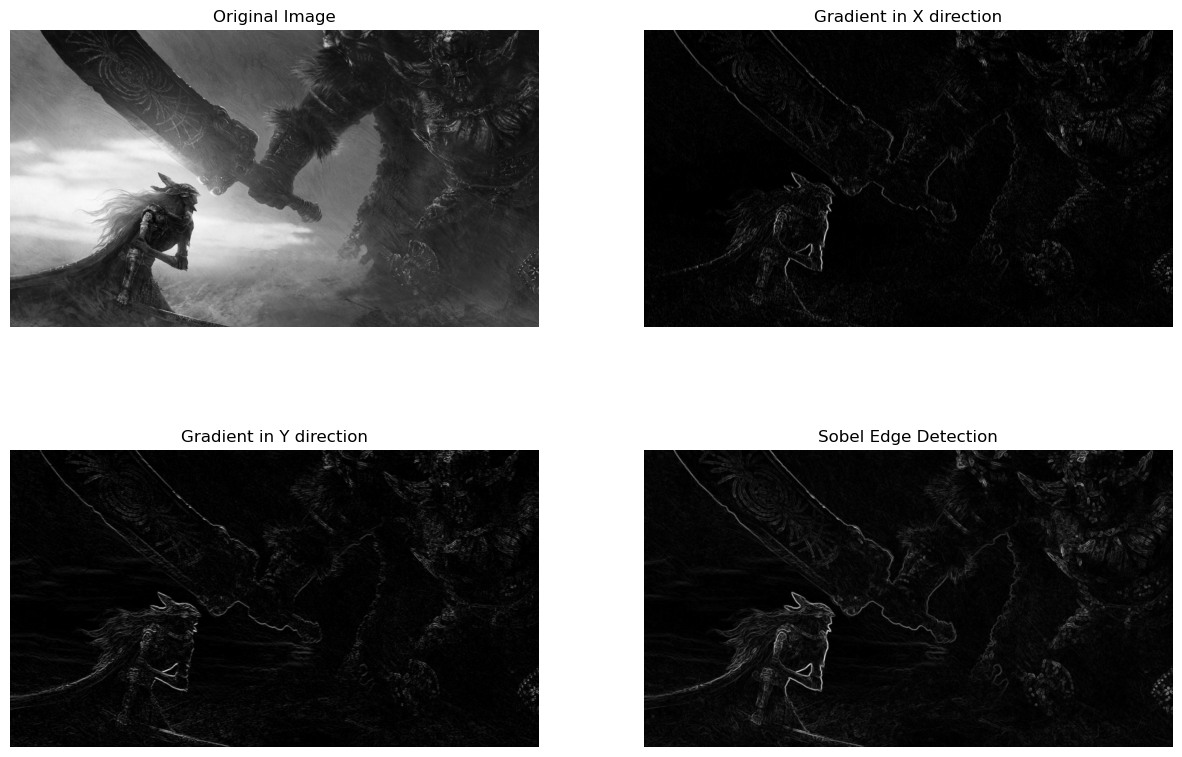

In [12]:
# apply Sobel - calc x and y gradients
Gx = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize=3) # CV_64F - asking for 64-bit float img - keep both neg and pos edge direction
Gy = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize=3)
# 1, 0: compute in x direction
# 0, 1: compute in y direction

# calculate gradient magnitude
G = np.sqrt(Gx**2 + Gy**2)

# normalise to range 0-255 - for better visualisation
# why need this? Gx, Gy, G can be very floating values with very large or negative. while img need to be in the uint8 range[0,255]
# to be displayed properly on plt
Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
G = np.uint8(255 * G / np.max(G))

# display the result
plt.figure(figsize=(15, 10))
# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(G, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()

# Using Canny edge detection

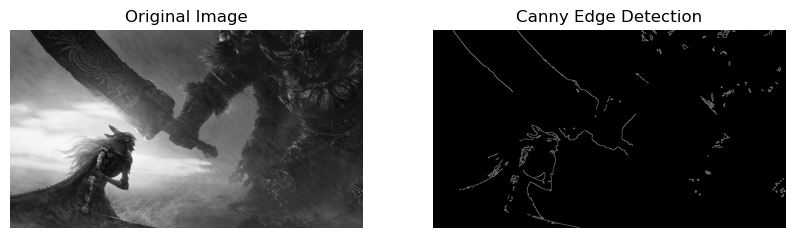

In [14]:
# Apply Gaussian blur to reduce noise
blurred_image = cv.GaussianBlur(img, (5, 5), 0)

# Apply Canny edge detector
edges = cv.Canny(blurred_image, 100, 200)

# Display the result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()